<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-05-10 15:08:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-05-10 15:08:14 (11.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.1.23  |                0         126 KB  anaconda
    openssl-1.0.2r             |       h7b6447c_0         3.2 MB  anaconda
    seaborn-0.9.0              |           py35_0         378 KB  anaconda
    certifi-2018.8.24          |           py35_1         139 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0          --> 2019.1.23-0       anaconda
    certifi:         2018.8.24-py35_1     --> 2018.8.24-py35_1  anaconda
    openssl:         1.0.2p-h14c3975_0    --> 1.0.2r-h7b6447c_0 anaconda
    seaborn:         0

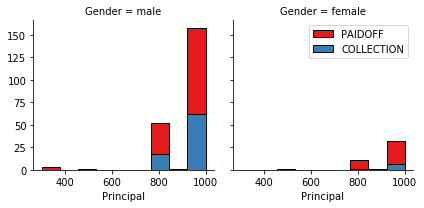

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

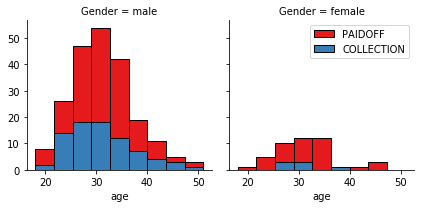

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

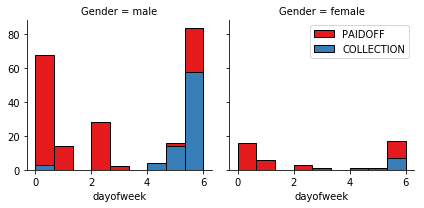

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [20]:
# K Nearest Neighbor (KNN) Code
# TRAIN TEST SPLIT
# to use scikit-learn library, we have to convert the Pandas data frame to a Numpy array -- already defined above -- X and y
# X = df[['Principal','terms','age','Gender','weekend', 'bechalor', 'High School or Below', 'college']].values
# y = df['loan_status'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set;', X_test.shape, y_test.shape)


Train set: (276, 8) (276,)
Test set; (70, 8) (70,)


In [21]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier
# Training
# start with k=1, then increase and rerun using "elbow method" to determine the best K value
k=1
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
# PREDICTING
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [23]:
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy:",metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:",metrics.accuracy_score(y_test,yhat))


Train set Accuracy: 0.894927536232
Test set Accuracy: 0.671428571429


In [24]:
# Accuracy of KNN for different Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([ 0.67142857,  0.65714286,  0.71428571,  0.68571429,  0.75714286,
        0.71428571,  0.78571429,  0.75714286,  0.75714286])

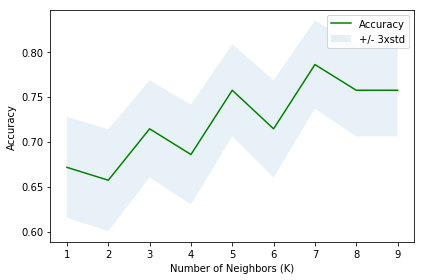

In [25]:
# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks), mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc -1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [26]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.785714285714 with k= 7


# Decision Tree

In [27]:
# Setting up the Decision Tree
# X (Features) and y (prediction) arrays 
# TRAIN TEST SPLIT
# to use scikit-learn library, we have to convert the Pandas data frame to a Numpy array -- already defined above -- X and y
# X = df[['Principal','terms','age','Gender','weekend', 'bechalor', 'High School or Below', 'college']].values
# y = df['loan_status'].values
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set;', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set; (70, 8) (70,)


In [28]:
# MODELING
# import library
from sklearn.tree import DecisionTreeClassifier

# create an instance of the DecisionTreeClassifier called loanTree
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
# Fit the data with X_trainset and y_trainset
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# PREDICTION
# make predictions and store it in the variable loan_predTree
loan_predTree=loanTree.predict(X_test)

In [31]:
# visually compare a few rows of the prediction to the actual values
print(loan_predTree[0:5])
print(y_test[0:5])

['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [32]:
# Evaluation
from sklearn import metrics
# import matplotlib.pyplot as plt, if plotting the Tree
print("DecisionTrees's Accuracy: ",metrics.accuracy_score(y_test, loan_predTree))


DecisionTrees's Accuracy:  0.614285714286


# Support Vector Machine

In [33]:
# import libraries
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split


In [ ]:
# define X (feature) and x (prediction) arrays
# X already defined
# y already defined

In [34]:
# Train/Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [35]:
# Modeling (SVM with Sciket-learn)
# look at distribution of classes using Radial Basis Function
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
# PREDICTION
yhat = clf.predict(X_test)
yhat [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [37]:
# Evaluation F1 Score from sklearn library:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 


0.72758820127241175

In [38]:
# Evaluation Jaccard index for accuracy:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)


0.74285714285714288

# Logistic Regression

In [41]:
# MODELING with Scikit-learn
# Import libraries
import pylab as pl
import scipy.optimize as opt
# Fit the data model with train set
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

In [42]:
# Prediction using test set
yhat = LR.predict(X_test)
yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [48]:
# Probability Estimates for all classes -- required for log loss calculation
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[ 0.5034238 ,  0.4965762 ],
       [ 0.45206111,  0.54793889],
       [ 0.30814132,  0.69185868],
       [ 0.34259428,  0.65740572],
       [ 0.32025894,  0.67974106],
       [ 0.31680537,  0.68319463],
       [ 0.48830185,  0.51169815],
       [ 0.47823073,  0.52176927],
       [ 0.34259428,  0.65740572],
       [ 0.4934056 ,  0.5065944 ],
       [ 0.33806706,  0.66193294],
       [ 0.49662231,  0.50337769],
       [ 0.24891907,  0.75108093],
       [ 0.3419095 ,  0.6580905 ],
       [ 0.43751789,  0.56248211],
       [ 0.25760497,  0.74239503],
       [ 0.52357188,  0.47642812],
       [ 0.30450278,  0.69549722],
       [ 0.50166363,  0.49833637],
       [ 0.3195971 ,  0.6804029 ],
       [ 0.44276988,  0.55723012],
       [ 0.49410185,  0.50589815],
       [ 0.51350333,  0.48649667],
       [ 0.47203498,  0.52796502],
       [ 0.40944694,  0.59055306],
       [ 0.50846442,  0.49153558],
       [ 0.51098415,  0.48901585],
       [ 0.37457647,  0.62542353],
       [ 0.50418423,

In [ ]:
# F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall
# of that label. The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best
# value at 1 # (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good
# value for both recall and precision. And finally, we can tell the average accuracy for this classifier is the
# average of the F1-score for both labels.


In [45]:
# Logistic Regression Evaluation using jaccard index (the count of true positives, false positives, true negatives,
# and false negatives 
# outputs:  Precision	recall	f1-score	support)
from sklearn.metrics import jaccard_similarity_score
print (jaccard_similarity_score(y_test, yhat))


0.685714285714


In [46]:
# Logistic Regression Evaluation using F1 score
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))


             precision    recall  f1-score   support

 COLLECTION       0.18      0.13      0.15        15
    PAIDOFF       0.78      0.84      0.81        55

avg / total       0.65      0.69      0.67        70



In [49]:
# Logistic Regression Evaluation using Log_loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.57722876094796538

# Model Evaluation using Test set

In [50]:
# Import libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [51]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-05-10 16:00:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-05-10 16:00:56 (702 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [52]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [53]:
# Convert to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


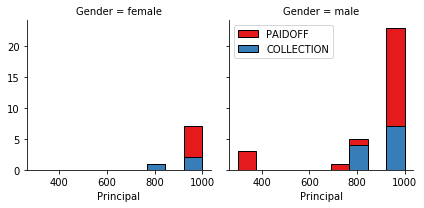

In [54]:
# Data visualization and pre-processing
# Let’s see how many of each class is in our data set
test_df['loan_status'].value_counts()
import seaborn as sns

bins = np.linspace(test_df.Principal.min(), test_df.Principal.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


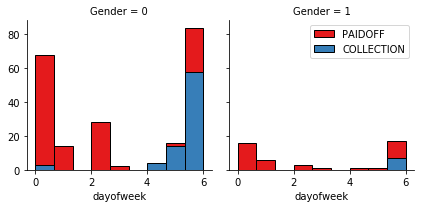

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [55]:
# Pre-processing: Feature selection/extraction
# Lets look at the day of the week people get the loan
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()


In [57]:
# Convert Categorical features to numerical values
# Lets look at gender:
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
# Lets convert male to 0 and female to 1:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [58]:
# One Hot Encoding
# How about education?
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
# Feature before One Hot Encoding
test_df[['Principal','terms','age','Gender','education']].head()
# Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [59]:
# Feature selection
# Lets define feature sets, X:
X = Feature
X[0:5]

# What are our lables? y:
y = test_df['loan_status'].values
y[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [60]:
# Normalize Data
# Data Standardization give data zero mean and unit variance
# (technically should be done after train test split )
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [ ]:
# K Nearest Neighbor (KNN) Code
# TRAIN TEST SPLIT already done for this dataset
# to use scikit-learn library, we have to convert the Pandas data frame to a Numpy array -- already defined above -- X and y
# X = df[['Principal','terms','age','Gender','weekend', 'bechalor', 'High School or Below', 'college']].values
# y = df['loan_status'].values
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
# print('Train set:', X_train.shape, y_train.shape)
# print('Test set;', X_test.shape, y_test.shape)


In [61]:
# KNN Calculatiion
# Import Library
from sklearn.neighbors import KNeighborsClassifier


In [62]:
# KNN Calculation
# Best K?
# Accuracy of KNN for different Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([ 0.67142857,  0.65714286,  0.71428571,  0.68571429,  0.75714286,
        0.71428571,  0.78571429,  0.75714286,  0.75714286])

In [63]:
# The best accuracy
print("The best accuracy was with",mean_acc.max(), "with k=",mean_acc.argmax()+1)

The best accuracy was with 0.785714285714 with k= 7


In [65]:
# Predicting using best k
k=7
neigh7=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat7=neigh7.predict(X_test)
yhat7

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [67]:
# K-NEAREST NEIGHBORS Accuracy Evaluation using jaccard index
# accuracy classification score (similar to jaccard_similarity_score function)
from sklearn.metrics import jaccard_similarity_score
print("Train set Accuracy:",metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:",metrics.accuracy_score(y_test,yhat))


Train set Accuracy: 0.789855072464
Test set Accuracy: 0.757142857143


In [69]:
# KNN F1 score for accuracy evaluation
# an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0
from sklearn.metrics import jaccard_similarity_score
print (jaccard_similarity_score(y_test, yhat))
print(classification_report(y_test,yhat))

0.757142857143
             precision    recall  f1-score   support

 COLLECTION       0.42      0.33      0.37        15
    PAIDOFF       0.83      0.87      0.85        55

avg / total       0.74      0.76      0.75        70



In [ ]:
# DecisionTree Calculation
# Setting up the Decision Tree
# X (Features) and y (prediction) arrays -- alreeady defined
# TRAIN TEST SPLIT
# to use scikit-learn library, we have to convert the Pandas data frame to a Numpy array -- already defined above -- X and y
# X = df[['Principal','terms','age','Gender','weekend', 'bechalor', 'High School or Below', 'college']].values
# y = df['loan_status'].values
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
# print('Train set:', X_train.shape, y_train.shape)
# print('Test set;', X_test.shape, y_test.shape)


In [70]:
# MODELING
# import library
from sklearn.tree import DecisionTreeClassifier

# create an instance of the DecisionTreeClassifier called loanTree
test_loanTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
test_loanTree


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
# Fit the data with X_trainset and y_trainset
test_loanTree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
# PREDICTION
# make predictions and store it in the variable test_loan_predTree
test_loan_predTree=test_loanTree.predict(X_test)
# visually compare a few rows of the prediction to the actual values
print(test_loan_predTree[0:5])
print(y_test[0:5])


['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [73]:
# DecisionTrees jaccard index accuracy evaluation
# the set of labels predicted for a sample must exactly match the corresponding set of labels
# in y_true (i.e.test_df pre-processed)
# accuracy classification score (similar to jaccard_similarity_score function)
from sklearn.metrics import jaccard_similarity_score
print("Test set Accuracy:",metrics.accuracy_score(y_test,test_loan_predTree))


Test set Accuracy: 0.614285714286


In [74]:
# DecisionTree F1 score for accuracy evaluation
# an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0
from sklearn.metrics import jaccard_similarity_score
print (jaccard_similarity_score(y_test, test_loan_predTree))
print(classification_report(y_test, test_loan_predTree))

0.614285714286
             precision    recall  f1-score   support

 COLLECTION       0.27      0.47      0.34        15
    PAIDOFF       0.82      0.65      0.73        55

avg / total       0.70      0.61      0.64        70



In [ ]:
# Support Vector Machine Calculation
# import libraries
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split

# define X (feature) and x (prediction) arrays
# X already defined
# y already defined
# Train/Test dataset
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
# print("Train set:",X_train.shape, y_train.shape)
# print("Test set:",X_test.shape, y_test.shape)



In [75]:
# Modeling (SVM with Sciket-learn)
# look at distribution of classes using Radial Basis Function
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
# PREDICTION
SVM_yhat = clf.predict(X_test)
SVM_yhat [0:5]


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [77]:
# SVM Accuracy Evaluation using jaccard index for accuracy
# accuracy classification score (similar to jaccard_similarity_score function)
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,SVM_yhat)


0.74285714285714288

In [78]:
# SVM F1 score for accuracy evaluation
# an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0
from sklearn.metrics import jaccard_similarity_score
print (jaccard_similarity_score(y_test, test_loan_predTree))
print(classification_report(y_test,SVM_yhat))

0.614285714286
             precision    recall  f1-score   support

 COLLECTION       0.36      0.27      0.31        15
    PAIDOFF       0.81      0.87      0.84        55

avg / total       0.72      0.74      0.73        70



In [79]:
# Logistic Regression
# import libraries
import pylab as pl
import scipy.optimize as opt


In [82]:
# MODELING with Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
# Modeling (Logistic Regression with Scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
# Prediction
LR_yhat = LR.predict(X_test)
LR_yhat


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [84]:
# Probability Estimates for all classes
yhat_prob = LR.predict_proba(X_test)
yhat_prob


array([[ 0.5034238 ,  0.4965762 ],
       [ 0.45206111,  0.54793889],
       [ 0.30814132,  0.69185868],
       [ 0.34259428,  0.65740572],
       [ 0.32025894,  0.67974106],
       [ 0.31680537,  0.68319463],
       [ 0.48830185,  0.51169815],
       [ 0.47823073,  0.52176927],
       [ 0.34259428,  0.65740572],
       [ 0.4934056 ,  0.5065944 ],
       [ 0.33806706,  0.66193294],
       [ 0.49662231,  0.50337769],
       [ 0.24891907,  0.75108093],
       [ 0.3419095 ,  0.6580905 ],
       [ 0.43751789,  0.56248211],
       [ 0.25760497,  0.74239503],
       [ 0.52357188,  0.47642812],
       [ 0.30450278,  0.69549722],
       [ 0.50166363,  0.49833637],
       [ 0.3195971 ,  0.6804029 ],
       [ 0.44276988,  0.55723012],
       [ 0.49410185,  0.50589815],
       [ 0.51350333,  0.48649667],
       [ 0.47203498,  0.52796502],
       [ 0.40944694,  0.59055306],
       [ 0.50846442,  0.49153558],
       [ 0.51098415,  0.48901585],
       [ 0.37457647,  0.62542353],
       [ 0.50418423,

In [85]:
# Evaluation using the count of true positives, false positives, true negatives, 
# and false negatives
# outputs:  Precision recall f1-score support
from sklearn.metrics import jaccard_similarity_score
print (jaccard_similarity_score(y_test, LR_yhat))


0.685714285714


In [86]:
# Logistic Regression F1 score for accuracy evaluation
# an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0
from sklearn.metrics import jaccard_similarity_score
print (jaccard_similarity_score(y_test, LR_yhat))
print(classification_report(y_test,LR_yhat))


0.685714285714
             precision    recall  f1-score   support

 COLLECTION       0.18      0.13      0.15        15
    PAIDOFF       0.78      0.84      0.81        55

avg / total       0.65      0.69      0.67        70



In [87]:
# Logloss
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.57722876094796538

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

## Reported Accuracy of the Built Model
|       Algorithm        |Jaccard        | F-1 score           | Log loss  |Comment
| ------------- |:-------------:| -----:|                |         |
| KNN      | 0.75| 0.75 |     *        |     *      |
| DecisionTree      |   0.61   |  0.64  |     *      |        *       |
| Source Vector Machine      | 0.74     |  0.73   |     *      |       *        |
| Logistical Regression      |  0.69    |  0.67   |     0.58     |       *        |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>